# Health Insurance Dataset

**Task**:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

* Both code and solution can be a single report file, e.g. .ipynb or .rmd

# Brief summary

I have done some preliminary data analysis to learn the data I'm working with and identify most significant features(as seen below they are: "smoker","age","bmi").
To predict "charges" I have build 2 models: linear regression and gradient boosting models.

## Steps:
1. Looked at the data, checked if there are missing values
2. Made plot to describe relationships between features grouping by categorical features("smoker","sex","region"), there can be noticed huge impact of smoking. Actually, faster way to see dependency between features is to use correlation map.
3. Labelled categorical features
4. Built models and evaluated them using coefficient of determination and mean absolute error.

## Interpretation
In pairplots can be noticed, that with increasing age of a client charges also increase, also age, smoking and bmi, as factors that define current/future state of the health, caused larger charges, what is obvious.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline 

# First view at the data

In [29]:
data = pd.read_csv(r'./ds_internship_task/insurance.csv')
print(data.head(10),data.describe(),data.info(),sep='\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1

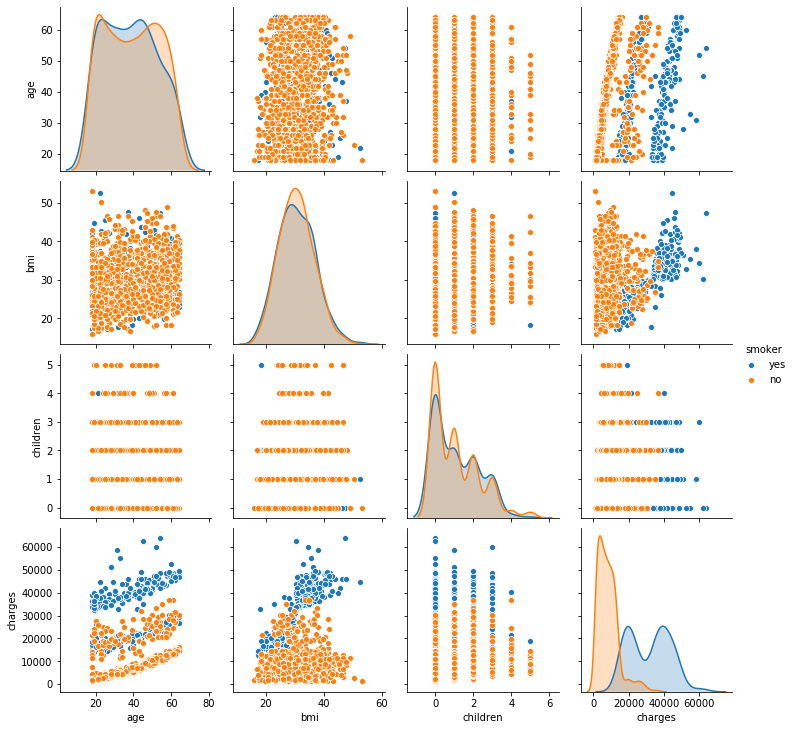

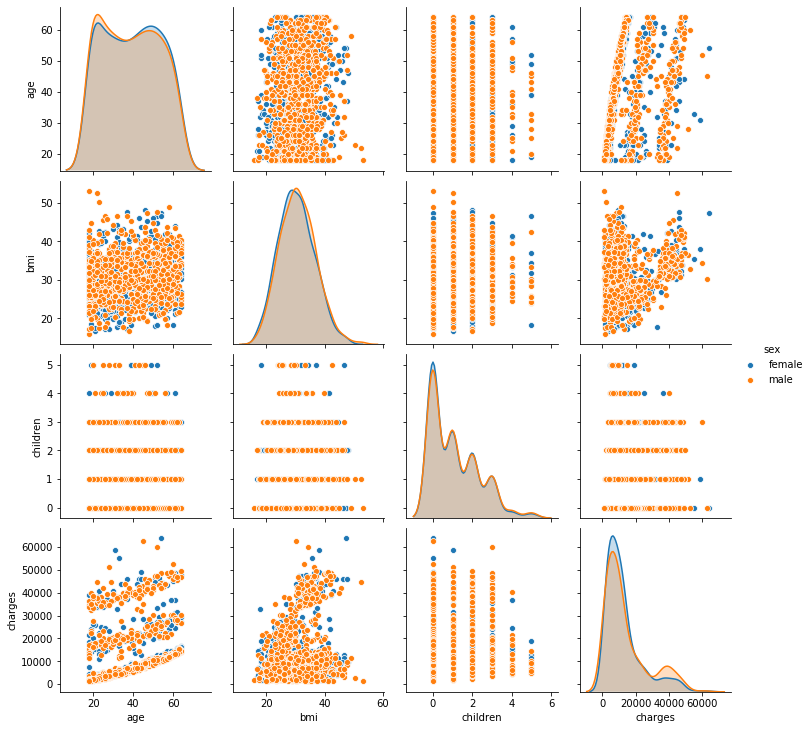

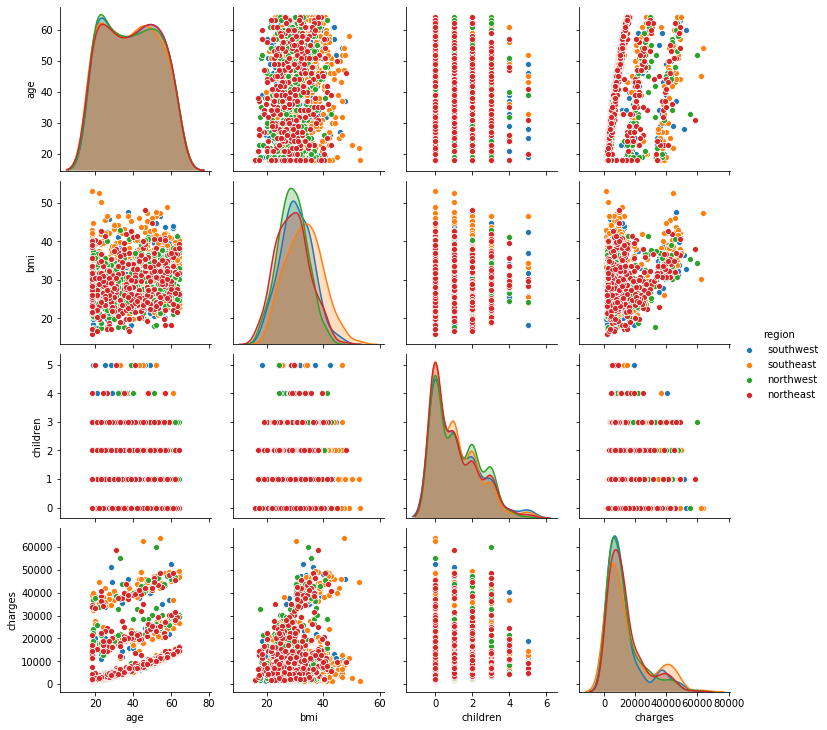

In [30]:
sns.pairplot(data,hue='smoker')
sns.pairplot(data,hue='sex')
sns.pairplot(data,hue='region')


# Building a model

In [31]:
X = data.drop(['charges'],axis=1)
y = data.charges
X = pd.get_dummies(X)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_model = LinearRegression()    
scores_r2 = cross_val_score(reg_model,X,y,cv=7)
print('Linear regression model\'s R2 in cross-validation:',scores_r2.mean())
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
print('Linear regression model:\n R2:', reg_model.score(X_test,y_test),' MAE: ',mean_absolute_error(y_test,y_pred))

Linear regression model's R2 in cross-validation: 0.7448438756563397
Linear regression model:
 R2: 0.7696118054369012  MAE:  4145.450555627586


In [32]:
grad_boosting_model = GradientBoostingRegressor()
scores_r2 = cross_val_score(grad_boosting_model,X,y,cv=7)
print('Gradient boosting model\'s R2 in cross-validation:',scores_r2.mean())
grad_boosting_model.fit(X_train,y_train)
y_pred = grad_boosting_model.predict(X_test)
print('Gradient boosting model:\n R2:', grad_boosting_model.score(X_test,y_test),' MAE: ',mean_absolute_error(y_test,y_pred))

Gradient boosting model's R2 in cross-validation: 0.8542665946540523
Gradient boosting model:
 R2: 0.8672564480270143  MAE:  2480.7577683505365


# Highest impact features

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


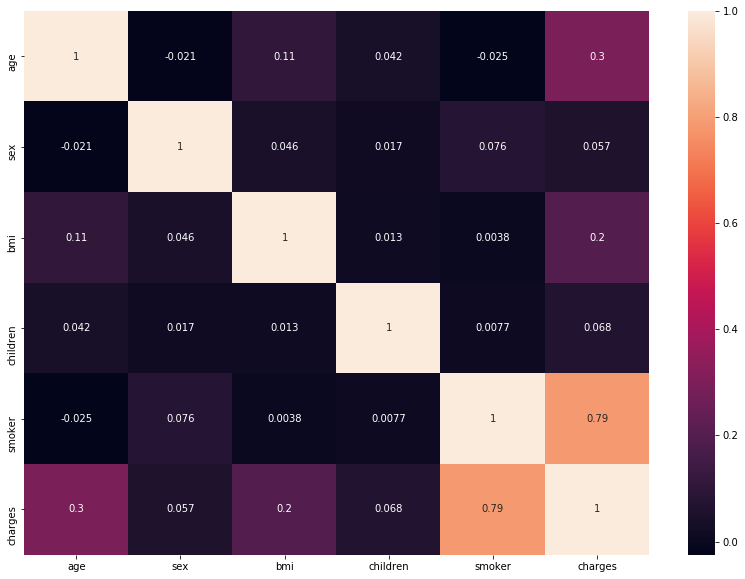

In [33]:
fig = plt.figure(figsize=(14,10))
labeled_data = data.copy()
labeled_data[['sex']] = labeled_data[['sex']].apply(LabelEncoder().fit_transform)
labeled_data[['smoker']] = labeled_data[['smoker']].apply(LabelEncoder().fit_transform)

print(labeled_data)
labeled_data_corr = labeled_data.corr()
print(labeled_data_corr['charges'].sort_values())
sns.heatmap(data = labeled_data_corr,annot = True)